In [6]:
import cv2
import ImageProcess
import numpy as np

In [7]:
# In[]:
ori_img = cv2.imread("image/02.jpg")

cv2.imshow('img', ori_img)
cv2.waitKey(0)
img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)
img=ImageProcess.Image_Filter(img,'GaussianBlur',show_image=True,size=5)
post_img=ImageProcess.Edge_Detection(img,'Sobel',gray=False,show_image=True)
#post_img=ImageProcess.Image_Filter(post_img,'GaussianBlur',show_image=True,size=7)
ret, th1 = cv2.threshold(post_img,80,255,cv2.THRESH_BINARY)


cv2.imshow('post_img', post_img)
cv2.imshow('th1_post_img', th1)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('ouutput/lenna_final.jpg', th1)

[ WARN:0@82.769] global loadsave.cpp:248 findDecoder imread_('image/02.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/highgui/src/window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [8]:
# In[2]: Morphology

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
#執行影象形態學

# 閉運算
closed = cv2.morphologyEx(th1, cv2.MORPH_CLOSE, kernel)
cv2.imshow('erode dilate', closed)
cv2.waitKey(0)
cv2.destroyAllWindows() 
# 膨脹2次，讓輪廓突出
closed = cv2.dilate(closed, None, iterations=2)
cv2.imshow('erode dilate', closed)
cv2.waitKey(0)
cv2.destroyAllWindows() 
# 腐蝕2次，去掉細節
closed = cv2.erode(closed, None, iterations=2)
cv2.imshow('erode dilate', closed)
cv2.waitKey(0)
cv2.destroyAllWindows() 




# (_, cnts, _) = cv2.findContours(closed,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
(cnts, _) = cv2.findContours(closed,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
 
'''
# 參考
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)
cv2.imshow('dilate erode', opened)
cv2.waitKey(0)
cv2.destroyAllWindows()  
# 膨脹10次，讓輪廓突出
opened = cv2.dilate(opened, None, iterations=10)
cv2.imshow('dilate erode', opened)
cv2.waitKey(0)
cv2.destroyAllWindows()  
# 腐蝕4次，去掉細節
opened = cv2.erode(opened, None, iterations=4)
cv2.imshow('dilate erode', opened)
cv2.waitKey(0)
cv2.destroyAllWindows()  

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (18, 7))
opened = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)
cv2.imshow('morphologyEx2', opened)
cv2.waitKey(0)
cv2.destroyAllWindows()  


(_, cnts, _) = cv2.findContours(opened,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
'''


NameError: name 'th1' is not defined

In [9]:
# In[]: determine by opencv

possible_img = ori_img.copy()
c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]
rect = cv2.minAreaRect(c)
Box = np.int0(cv2.boxPoints(rect))
Final_img = cv2.drawContours(possible_img, [Box], -1, (0, 0, 255), 3)
cv2.imshow('Final_img', Final_img)
cv2.waitKey(0) 
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'copy'

In [10]:
# In[]: determine by 工人智慧
possible_img = ori_img.copy()

for c in sorted(cnts, key=cv2.contourArea, reverse=True):
    #print (c)
      
    rect = cv2.minAreaRect(c)
    #print ('rectt', rect)
    Box = np.int0(cv2.boxPoints(rect))
    #print ('Box', Box)    
    Box=ImageProcess.order_points_new(Box) # return  左上/右上/右下/左下 (x,y)
    #print ('Box2',Box)
    
    possible_img = cv2.drawContours(possible_img, [Box], -1, (0, 0, 255), 3)
    cv2.imshow('possible_img', possible_img)
    
#cv2.imshow('possible_img', possible_img) 
cv2.waitKey(0)
cv2.destroyAllWindows() 

AttributeError: 'NoneType' object has no attribute 'copy'

In [11]:
# In[]: determine by 工人智慧

possible_img = ori_img.copy()

for c in sorted(cnts, key=cv2.contourArea, reverse=True):
    #print (c)
      
    rect = cv2.minAreaRect(c)
    #print ('rectt', rect)
    Box = np.int0(cv2.boxPoints(rect))
    #print ('Box', Box)    
    Box=ImageProcess.order_points_new(Box) # return  左上/右上/右下/左下 (x,y)
    #print ('Box2',Box)
    
    # determine by 工人智慧
    
    if ((Box[1][0]-Box[0][0])>(Box[3][1]-Box[0][1])) and abs(Box[0][1]-Box[1][1])<30:
        possible_img = cv2.drawContours(possible_img, [Box], -1, (0, 0, 255), 3)
        cv2.imshow('possible_img', possible_img)
        break
    
#cv2.imshow('possible_img', possible_img) 
cv2.waitKey(0)
cv2.destroyAllWindows() 


AttributeError: 'NoneType' object has no attribute 'copy'

In [12]:
''' 回家作業2-- 試著調整配置、參數 嘗試以經驗法則/工人智慧 輸出最佳車牌定位結果 ''' 

' 回家作業2-- 試著調整配置、參數 嘗試以經驗法則/工人智慧 輸出最佳車牌定位結果 '

In [4]:

import cv2
import numpy as np 
import matplotlib.pyplot as plt

def Edge_Detection(img,method,gray=True,XY=(1,1),Weight=(0.5,0.5,0),th=(30,150),size=3,save_image=True,show_image=False):
    # RGB to grayscale
    if gray:
        try:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        except:
            print ('Error!!! check your [img] shape/dtype')
            return
       
    # Edge_Detection
    if method=='Sobel':
        img_x = cv2.Sobel(img, cv2.CV_16S, XY[0], 0, ksize=size) # 計算水平
        img_y = cv2.Sobel(img, cv2.CV_16S, 0, XY[1], ksize=size) # 計算垂直

    elif method=='Scharr':
        img_x = cv2.Scharr(img,cv2.CV_64F, XY[0], 0)
        img_y = cv2.Scharr(img,cv2.CV_64F, 0, XY[1])
    
    elif method=='Laplacian':
        post_img = cv2.Laplacian(img, cv2.CV_16S, ksize=size)
        post_img = cv2.convertScaleAbs(post_img)
        
    elif method=='Canny':
        if gray:
            post_img = cv2.Canny(img, th[0], th[1], apertureSize=size)
        else:
            print ('Error!!! Canny must be converted to grayscale, set gray=True')
            return
    else:
        print ('method have to be Sobel, Scharr, Laplacian or Canny')
        
    
    # addWeight for Sobel and Scharr
    if method=='Sobel' or method=='Scharr':
        absX = cv2.convertScaleAbs(img_x)
        absY = cv2.convertScaleAbs(img_y)
        post_img=cv2.addWeighted(absX, Weight[0], absY, Weight[1], Weight[2])
       
    # save image or not    
    if save_image: cv2.imwrite('ouutput/lenna_'+method+'.jpg', post_img) 
    
    print ('edge detect method:',method)
    print ('post_img.shape:',post_img.shape)
    print ('post_img.dtype',post_img.dtype)
    print ("//-------------------------------------------")
    
    # show image or not 
    if show_image:
        plt.imshow(post_img, cmap="gray")
        plt.show()
        #cv2.destroyAllWindows()
        
    return post_img


def Image_Filter (img,method,size=3,show_image=False): 
    if method=='blur':
        img = cv2.blur(img, (size,size))
    elif method=='GaussianBlur':
        img = cv2.GaussianBlur(img, (size, size), 0)
    elif method=='medianBlur':
        img = cv2.medianBlur(img, size)
    elif method=='bilateralFilter':
        img = cv2.bilateralFilter(img,size,75,75)
    else:
        print ('method have to be blur, GaussianBlur, medianBlur or bilateralFilter')
    if show_image:
        plt.imshow(img, cmap="gray")
        plt.show()
        #cv2.destroyAllWindows()

    return img

def order_points_new(pts):
    # sort the points based on their x-coordinates
    xSorted = pts[np.argsort(pts[:, 0]), :]

    # grab the left-most and right-most points from the sorted
    # x-roodinate points
    leftMost = xSorted[:2, :]
    rightMost = xSorted[2:, :]
    if leftMost[0,1]!=leftMost[1,1]:
        leftMost=leftMost[np.argsort(leftMost[:,1]),:]
    else:
        leftMost=leftMost[np.argsort(leftMost[:,0])[::-1],:]
    (tl, bl) = leftMost
    if rightMost[0,1]!=rightMost[1,1]:
        rightMost=rightMost[np.argsort(rightMost[:,1]),:]
    else:
        rightMost=rightMost[np.argsort(rightMost[:,0])[::-1],:]
    (tr,br)=rightMost
    # return the coordinates in top-left, top-right,
    # bottom-right, and bottom-left order
    return np.array([tl, tr, br, bl], dtype="int")

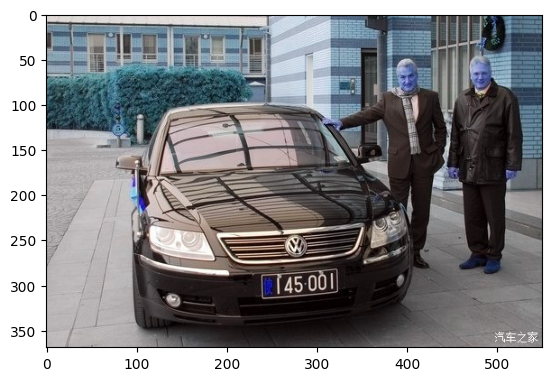

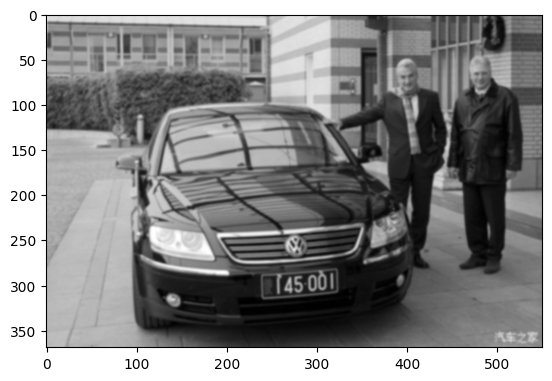

edge detect method: Sobel
post_img.shape: (369, 550)
post_img.dtype uint8
//-------------------------------------------


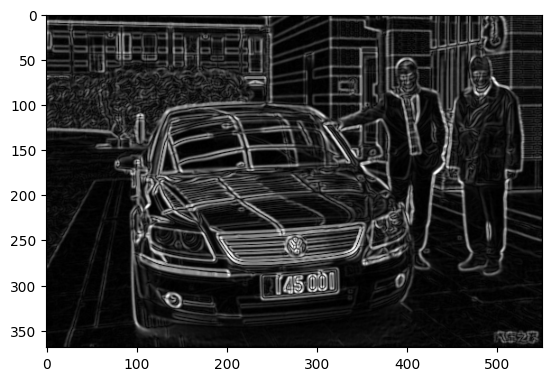

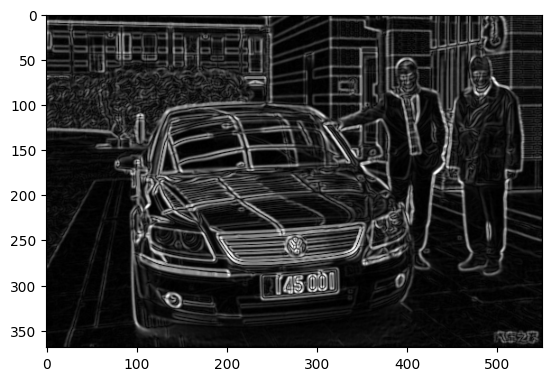

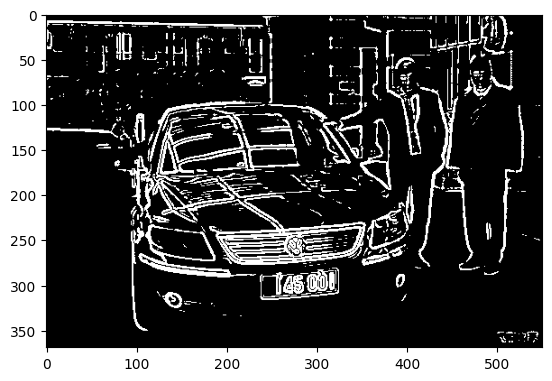

In [14]:
image_file = ["/Users/liushiwen/Desktop/大四下/機器學習系統/MLSystemDesign/hw1/LicensePlate/image/01.jpg", "/Users/liushiwen/Desktop/大四下/機器學習系統/MLSystemDesign/hw1/LicensePlate/image/02.jpg", "/Users/liushiwen/Desktop/大四下/機器學習系統/MLSystemDesign/hw1/LicensePlate/image/03.jpg"]
ori_img = cv2.imread(image_file[2])
plt.imshow(ori_img, cmap="gray")
plt.show()

img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)
img=Image_Filter(img,'GaussianBlur',show_image=True,size=5)
post_img=Edge_Detection(img,'Sobel',gray=False,show_image=True)
#post_img=ImageProcess.Image_Filter(post_img,'GaussianBlur',show_image=True,size=7)
ret, th1 = cv2.threshold(post_img,85,255,cv2.THRESH_BINARY)
plt.imshow(post_img, cmap="gray")
plt.show()

plt.imshow(th1, cmap="gray")
plt.show()

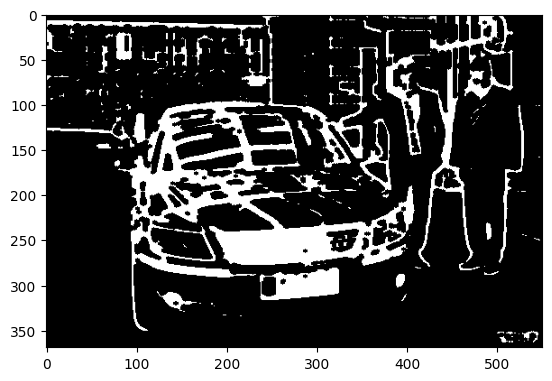

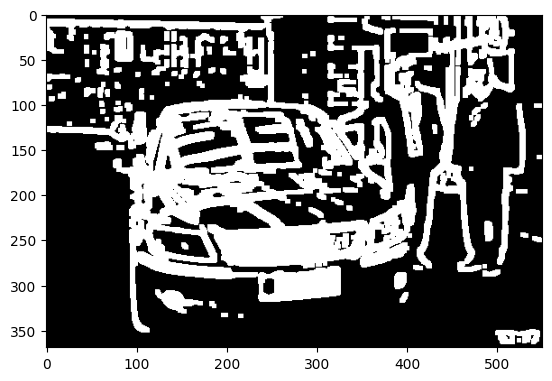

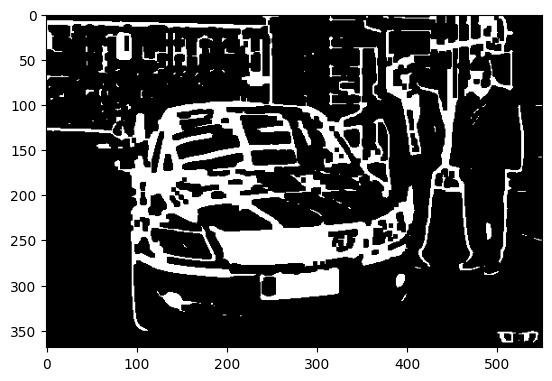

In [15]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
#執行影象形態學

# 閉運算
closed = cv2.morphologyEx(th1, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed, cmap="gray")
plt.show()
# 膨脹2次，讓輪廓突出
closed = cv2.dilate(closed, None, iterations=2)
plt.imshow(closed, cmap="gray")
plt.show()
# 腐蝕2次，去掉細節
closed = cv2.erode(closed, None, iterations=2)
plt.imshow(closed, cmap="gray")
plt.show()

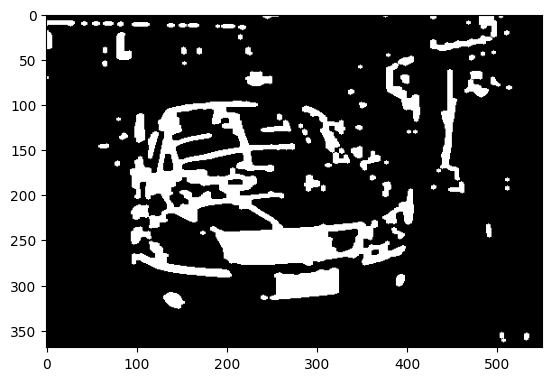

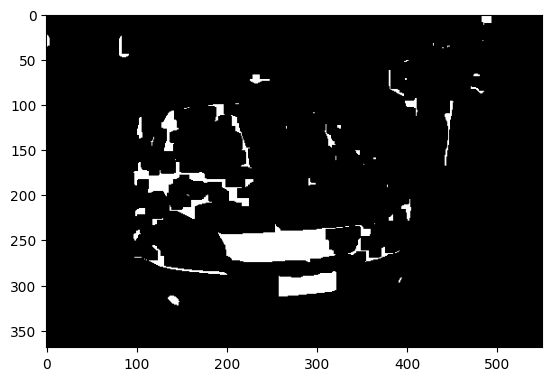

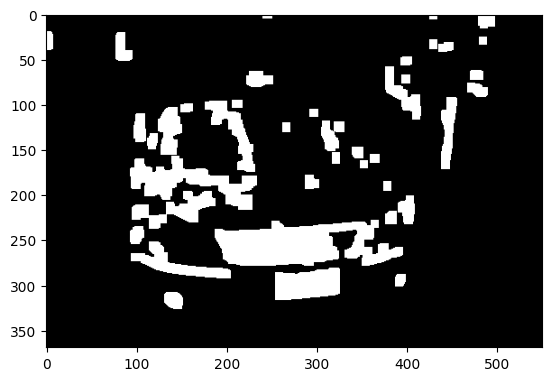

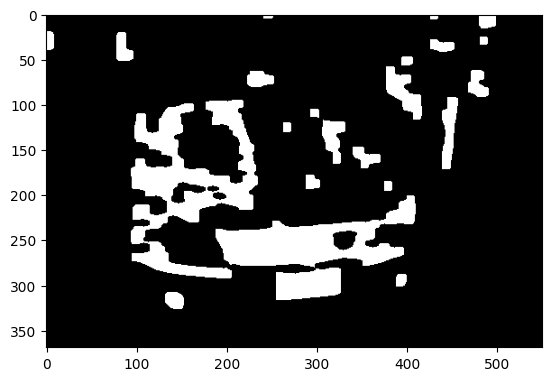

In [16]:
(cnts, _) = cv2.findContours(closed,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


# 參考

# 開運算
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)
plt.imshow(opened, cmap="gray")
plt.show()
# 腐蝕3次，去掉細節
opened = cv2.erode(opened, None, iterations=3)
plt.imshow(opened, cmap="gray")
plt.show()
# 膨脹10次，讓輪廓突出
opened = cv2.dilate(opened, None, iterations=4)
plt.imshow(opened, cmap="gray")
plt.show()

# 閉運算
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (12, 7))
opened = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)
plt.imshow(opened, cmap="gray")
plt.show()

# (_, cnts, _) = cv2.findContours(opened,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
(cnts, _) = cv2.findContours(closed,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


/var/folders/5c/z2dd4yzx5w78s1v0vb9y2cxr0000gn/T/ipykernel_67229/314303812.py:4: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  Box = np.int0(cv2.boxPoints(rect))
/var/folders/5c/z2dd4yzx5w78s1v0vb9y2cxr0000gn/T/ipykernel_67229/314303812.py:17: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  Box = np.int0(cv2.boxPoints(rect))


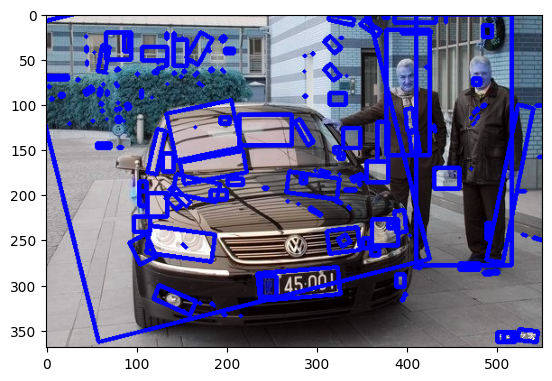

/var/folders/5c/z2dd4yzx5w78s1v0vb9y2cxr0000gn/T/ipykernel_67229/314303812.py:39: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  Box = np.int0(cv2.boxPoints(rect))


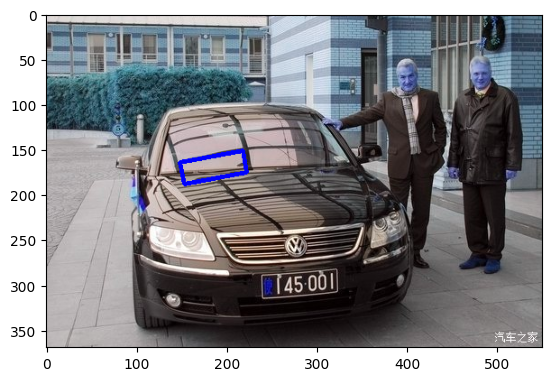

In [17]:
possible_img = ori_img.copy()
c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]
rect = cv2.minAreaRect(c)
Box = np.int0(cv2.boxPoints(rect))
Final_img = cv2.drawContours(possible_img, [Box], -1, (0, 0, 255), 3)
# plt.imshow(Final_img, cmap="gray")
# plt.show()
# In[]: determine by 工人智慧,抓取多個可能的方框

possible_img = ori_img.copy()

for c in sorted(cnts, key=cv2.contourArea, reverse=True):
    #print (c)
      
    rect = cv2.minAreaRect(c)
    #print ('rectt', rect)
    Box = np.int0(cv2.boxPoints(rect))
    #print ('Box', Box)    
    Box=order_points_new(Box) # return  左上/右上/右下/左下 (x,y)
    #print ('Box2',Box)
    
    possible_img = cv2.drawContours(possible_img, [Box], -1, (0, 0, 255), 3)
    cv2.imshow('possible_img', possible_img)
     
#cv2.imshow('possible_img', possible_img) 

plt.imshow(possible_img, cmap="gray")
plt.show()

# In[]: determine by 工人智慧,抓取指定的方框

possible_img = ori_img.copy()

for c in sorted(cnts, key=cv2.contourArea, reverse=True):
    #print (c)
      
    rect = cv2.minAreaRect(c)
    #print ('rectt', rect)
    Box = np.int0(cv2.boxPoints(rect))
    #print ('Box', Box)    
    Box=order_points_new(Box) # return  左上/右上/右下/左下 (x,y)
    #print ('Box2',Box)
    
    # determine by 工人智慧,指定方框條件設定,同學們可以在這裡調整條件
    
    if ((Box[1][0]-Box[0][0])>(Box[3][1]-Box[0][1])) and 17<abs(Box[1][1]-Box[2][1])<32  and 40<abs(Box[0][0]-Box[1][0])<71  and abs(Box[0][1]-Box[1][1])<20  :
        possible_img = cv2.drawContours(possible_img, [Box], -1, (0, 0, 255), 3)
        cv2.imshow('possible_img', possible_img)
        break
    
plt.imshow(possible_img, cmap="gray")
plt.show()
# cv2.imwrite('output/01.jpg', possible_img)






[[-28  14]
 [338 -77]
 [425 271]
 [ 58 363]]
[[410   0]
 [516   0]
 [516 278]
 [410 278]]
[[133 110]
 [205  95]
 [216 147]
 [144 162]]
[[234 287]
 [323 280]
 [326 310]
 [237 317]]
234


/var/folders/5c/z2dd4yzx5w78s1v0vb9y2cxr0000gn/T/ipykernel_67229/1234886930.py:9: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  Box = np.int0(cv2.boxPoints(rect))


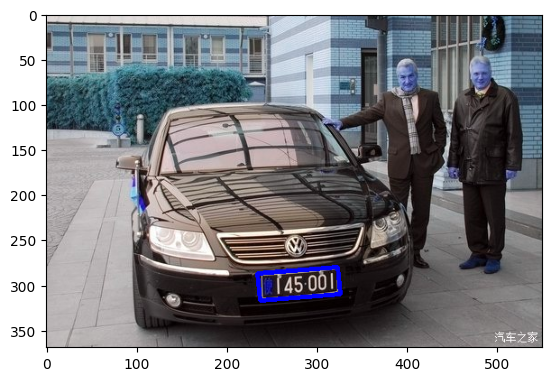

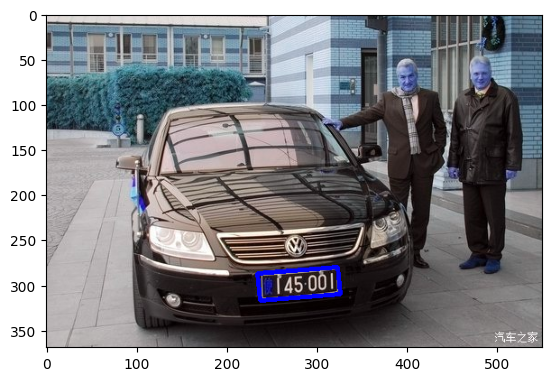

In [45]:
possible_img = ori_img.copy()

for c in sorted(cnts, key=cv2.contourArea, reverse=True):
    #print (c)
      
    rect = cv2.minAreaRect(c)
    
    #print ('rectt', rect)
    Box = np.int0(cv2.boxPoints(rect))
    #print ('Box', Box)    
    Box=order_points_new(Box) # return  左上/右上/右下/左下 (x,y)
    print(Box)
    #print ('Box2',Box)
    
    # determine by 工人智慧,指定方框條件設定,同學們可以在這裡調整條件
    
    # if ((Box[1][0]-Box[0][0])>(Box[3][1]-Box[0][1])) and 25<abs(Box[1][1]-Box[2][1])<32  and 50<abs(Box[0][0]-Box[1][0])<111  and abs(Box[0][1]-Box[1][1])<20  :
    if (((Box[1][0]-Box[0][0])-(Box[3][1]-Box[0][1]))>40) and 20<abs(Box[1][1]-Box[2][1])<100  and 60<abs(Box[0][0]-Box[1][0])<200  and abs(Box[0][1]-Box[1][1])<20  :
    # if Box[1][1]-Box[2][1]<50  and 60<Box[1][0]-Box[0][0]<200  and Box[0][1]-Box[1][1]<20  :
        possible_img = cv2.drawContours(possible_img, [Box], -1, (0, 0, 255), 3)
        print(Box[0][0])
        # cv2.imshow('possible_img', possible_img)
        plt.imshow(possible_img, cmap="gray")
        plt.show()
        break
    
plt.imshow(possible_img, cmap="gray")
plt.show()
# cv2.imwrite('output/01.jpg', possible_img)

edge detect method: Sobel
post_img.shape: (450, 600)
post_img.dtype uint8
//-------------------------------------------


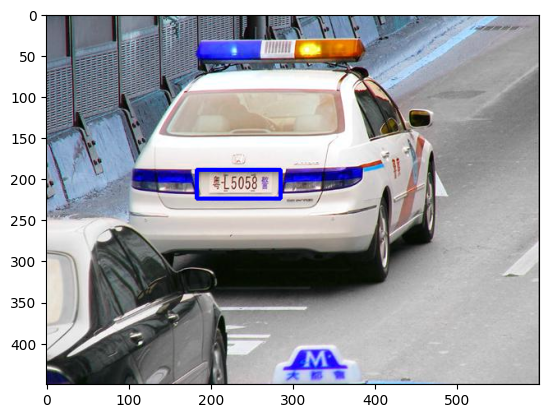

edge detect method: Sobel
post_img.shape: (600, 800)
post_img.dtype uint8
//-------------------------------------------


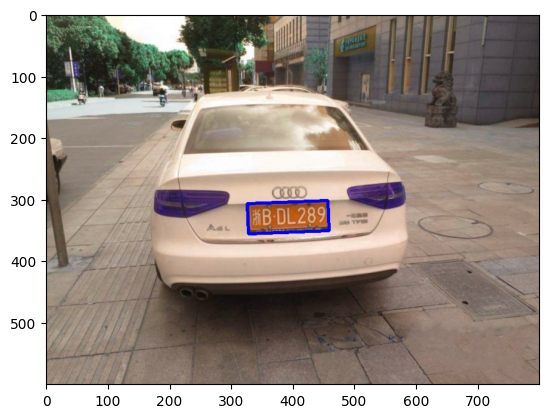

edge detect method: Sobel
post_img.shape: (369, 550)
post_img.dtype uint8
//-------------------------------------------


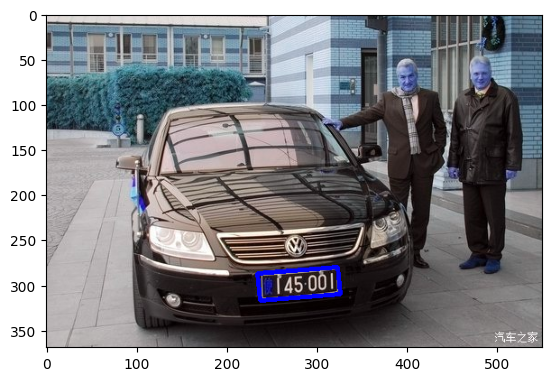

In [25]:
import cv2
import ImageProcess
import numpy as np
import matplotlib.pyplot as plt


image_file = ["/Users/liushiwen/Desktop/大四下/機器學習系統/MLSystemDesign/hw1/LicensePlate/image/01.jpg", "/Users/liushiwen/Desktop/大四下/機器學習系統/MLSystemDesign/hw1/LicensePlate/image/02.jpg", "/Users/liushiwen/Desktop/大四下/機器學習系統/MLSystemDesign/hw1/LicensePlate/image/03.jpg"]
def main(img_path):
    ori_img = cv2.imread(img_path) 
    plt.imshow(ori_img, cmap="gray")

    img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)
    img=Image_Filter(img,'GaussianBlur',show_image=False,size=5)
    post_img=Edge_Detection(img,'Sobel',gray=False,show_image=False)
    #post_img=ImageProcess.Image_Filter(post_img,'GaussianBlur',show_image=True,size=7)
    ret, th1 = cv2.threshold(post_img,85,255,cv2.THRESH_BINARY)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    # 閉運算
    closed = cv2.morphologyEx(th1, cv2.MORPH_CLOSE, kernel)
    closed = cv2.dilate(closed, None, iterations=2)
    closed = cv2.erode(closed, None, iterations=2)
    (cnts, _) = cv2.findContours(closed,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    possible_img = ori_img.copy()

    for c in sorted(cnts, key=cv2.contourArea, reverse=True):
        rect = cv2.minAreaRect(c)
        Box = np.intp(cv2.boxPoints(rect))
        Box=order_points_new(Box) # return  左上/右上/右下/左下 (x,y)
        # determine by 工人智慧,指定方框條件設定,同學們可以在這裡調整條件
        if  20<Box[2][1]-Box[1][1]<80  and 60<abs(Box[0][0]-Box[1][0])<200  and -3<Box[0][1]-Box[1][1]<10  :
            possible_img = cv2.drawContours(possible_img, [Box], -1, (0, 0, 255), 3)
            plt.imshow(possible_img, cmap="gray")
            plt.show()
            break
for ii in range(3):

    main(image_file[ii])
# plt.imshow(possible_img, cmap="gray")
# plt.show()


/var/folders/5c/z2dd4yzx5w78s1v0vb9y2cxr0000gn/T/ipykernel_67229/638765134.py:63: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  Box = np.int0(cv2.boxPoints(rect))
/var/folders/5c/z2dd4yzx5w78s1v0vb9y2cxr0000gn/T/ipykernel_67229/638765134.py:73: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  Box = np.int0(cv2.boxPoints(rect))
/var/folders/5c/z2dd4yzx5w78s1v0vb9y2cxr0000gn/T/ipykernel_67229/638765134.py:82: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  Box = np.int0(cv2.boxPoints(rect))


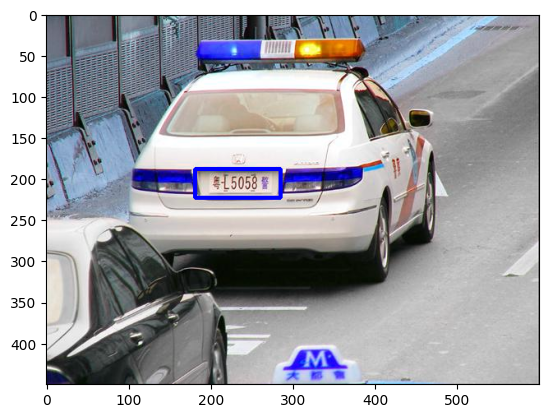

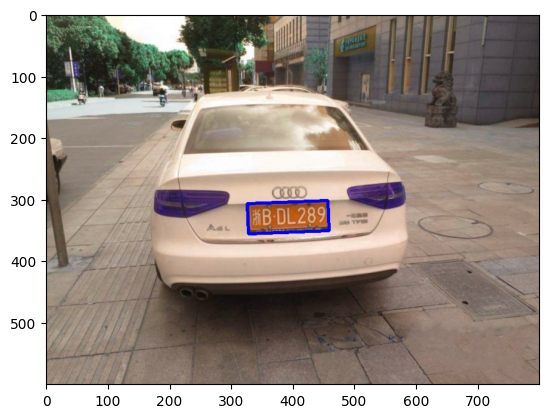

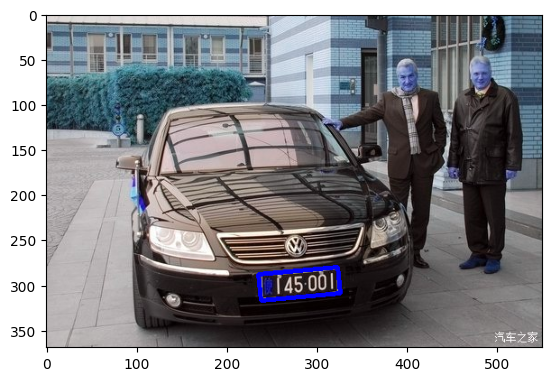

In [4]:
# paste your code below
import cv2
import ImageProcess
import numpy as np
import matplotlib.pyplot as plt
image_file = ["/Users/liushiwen/Desktop/大四下/機器學習系統/MLSystemDesign/hw1/LicensePlate/image/01.jpg", "/Users/liushiwen/Desktop/大四下/機器學習系統/MLSystemDesign/hw1/LicensePlate/image/02.jpg", "/Users/liushiwen/Desktop/大四下/機器學習系統/MLSystemDesign/hw1/LicensePlate/image/03.jpg"]

def order_points_new(pts):
    # sort the points based on their x-coordinates
    xSorted = pts[np.argsort(pts[:, 0]), :]

    # grab the left-most and right-most points from the sorted
    # x-roodinate points
    leftMost = xSorted[:2, :]
    rightMost = xSorted[2:, :]
    if leftMost[0,1]!=leftMost[1,1]:
        leftMost=leftMost[np.argsort(leftMost[:,1]),:]
    else:
        leftMost=leftMost[np.argsort(leftMost[:,0])[::-1],:]
    (tl, bl) = leftMost
    if rightMost[0,1]!=rightMost[1,1]:
        rightMost=rightMost[np.argsort(rightMost[:,1]),:]
    else:
        rightMost=rightMost[np.argsort(rightMost[:,0])[::-1],:]
    (tr,br)=rightMost
    # return the coordinates in top-left, top-right,
    # bottom-right, and bottom-left order
    return np.array([tl, tr, br, bl], dtype="int")

def main(ksize:list,thre:list,itera:list,image_list:list)->None:
    
    result = []


    for k in range(len(ksize)):
        for t in range(len(thre)):
            for i in range(len(itera)):
                for image in image_list:
                    ori_img = cv2.imread(image) 

                    img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)
                    img=ImageProcess.Image_Filter(img,'bilateralFilter',show_image=False,size=ksize[k])             ### ksize
                    post_img=ImageProcess.Edge_Detection(img,'Sobel',gray=False, show_image=False)
                    # post_img=ImageProcess.Image_Filter(post_img,'GaussianBlur',show_image=True,size=4)
                    ret, th1 = cv2.threshold(post_img,thre[t],255,cv2.THRESH_BINARY)                               ### thre

                    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
                    #執行影象形態學

                    # 閉運算
                    closed = cv2.morphologyEx(th1, cv2.MORPH_CLOSE, kernel)
                    closed = cv2.dilate(closed, None, iterations=itera[i])                  ### iterations
                    closed = cv2.erode(closed, None, iterations=itera[i])                   ### iterations

                    (cnts, _) = cv2.findContours(closed,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

                    possible_img = ori_img.copy()
                    c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]
                    rect = cv2.minAreaRect(c)
                    Box = np.int0(cv2.boxPoints(rect))
                    Final_img = cv2.drawContours(possible_img, [Box], -1, (0, 0, 255), 3)


                    possible_img = ori_img.copy()

                    for c in sorted(cnts, key=cv2.contourArea, reverse=True):
                        #print (c)
                    
                        rect = cv2.minAreaRect(c)
                        Box = np.int0(cv2.boxPoints(rect))
                        Box=order_points_new(Box) # return  左上/右上/右下/左下 (x,y)                
                        possible_img = cv2.drawContours(possible_img, [Box], -1, (0, 0, 255), 3)

                    possible_img = ori_img.copy()

                    for c in sorted(cnts, key=cv2.contourArea, reverse=True):
                    
                        rect = cv2.minAreaRect(c)
                        Box = np.int0(cv2.boxPoints(rect))
                        Box=ImageProcess.order_points_new(Box)
                    
                        # determine by 工人智慧,指定方框條件設定,同學們可以在這裡調整條件
                    
                        if (((Box[1][0]-Box[0][0])-(Box[3][1]-Box[0][1]))>40) and 20<abs(Box[1][1]-Box[2][1])<100  and 60<abs(Box[0][0]-Box[1][0])<200  and abs(Box[0][1]-Box[1][1])<20  :
                            possible_img = cv2.drawContours(possible_img, [Box], -1, (0, 0, 255), 3)

                            break

                    result.append(possible_img)
                
                cv2.imwrite('output/01.jpg', result[0])
                cv2.imwrite('output/02.jpg', result[1])
                cv2.imwrite('output/03.jpg', result[2])
                plt.imshow( result[0], cmap="gray")
                plt.show()
                plt.imshow( result[1], cmap="gray")
                plt.show()
                plt.imshow( result[2], cmap="gray")
                plt.show()
############################################################################################
# if __name__ == '__main__':
    # image_list = ['image/01.jpg', 'image/02.jpg', 'image/03.jpg']
ksize = [4]
thre=[80]
itera=[1]
main(ksize,thre,itera,image_file)

/var/folders/5c/z2dd4yzx5w78s1v0vb9y2cxr0000gn/T/ipykernel_67229/2762704081.py:59: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  Box = np.int0(cv2.boxPoints(rect))
/var/folders/5c/z2dd4yzx5w78s1v0vb9y2cxr0000gn/T/ipykernel_67229/2762704081.py:69: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  Box = np.int0(cv2.boxPoints(rect))
/var/folders/5c/z2dd4yzx5w78s1v0vb9y2cxr0000gn/T/ipykernel_67229/2762704081.py:78: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  Box = np.int0(cv2.boxPoints(rect))


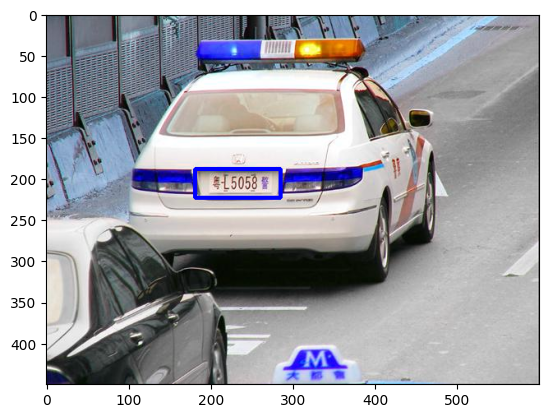

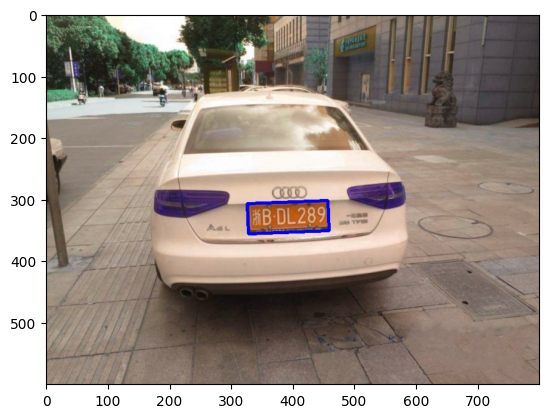

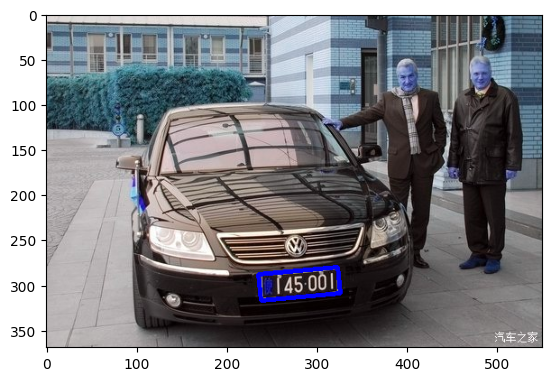

In [43]:
# paste your code below
import cv2
import ImageProcess
import numpy as np
import matplotlib.pyplot as plt
image_file = ["/Users/liushiwen/Desktop/大四下/機器學習系統/MLSystemDesign/hw1/LicensePlate/image/01.jpg", "/Users/liushiwen/Desktop/大四下/機器學習系統/MLSystemDesign/hw1/LicensePlate/image/02.jpg", "/Users/liushiwen/Desktop/大四下/機器學習系統/MLSystemDesign/hw1/LicensePlate/image/03.jpg"]

def order_points_new(pts):
    # sort the points based on their x-coordinates
    xSorted = pts[np.argsort(pts[:, 0]), :]

    # grab the left-most and right-most points from the sorted
    # x-roodinate points
    leftMost = xSorted[:2, :]
    rightMost = xSorted[2:, :]
    if leftMost[0,1]!=leftMost[1,1]:
        leftMost=leftMost[np.argsort(leftMost[:,1]),:]
    else:
        leftMost=leftMost[np.argsort(leftMost[:,0])[::-1],:]
    (tl, bl) = leftMost
    if rightMost[0,1]!=rightMost[1,1]:
        rightMost=rightMost[np.argsort(rightMost[:,1]),:]
    else:
        rightMost=rightMost[np.argsort(rightMost[:,0])[::-1],:]
    (tr,br)=rightMost
    # return the coordinates in top-left, top-right,
    # bottom-right, and bottom-left order
    return np.array([tl, tr, br, bl], dtype="int")

def main(ksize:list,thre:list,itera:list,image_list:list)->None:
    result = []


    for k in range(len(ksize)):
        for t in range(len(thre)):
            for i in range(len(itera)):
                for image in image_list:
                    ori_img = cv2.imread(image) 

                    img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)
                    img=ImageProcess.Image_Filter(img,'bilateralFilter',show_image=False,size=ksize[k])             ### ksize
                    post_img=ImageProcess.Edge_Detection(img,'Sobel',gray=False, show_image=False)
                    # post_img=ImageProcess.Image_Filter(post_img,'GaussianBlur',show_image=True,size=4)
                    ret, th1 = cv2.threshold(post_img,thre[t],255,cv2.THRESH_BINARY)                               ### thre

                    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
                    #執行影象形態學

                    # 閉運算
                    closed = cv2.morphologyEx(th1, cv2.MORPH_CLOSE, kernel)
                    closed = cv2.dilate(closed, None, iterations=itera[i])                  ### iterations
                    closed = cv2.erode(closed, None, iterations=itera[i])                   ### iterations

                    (cnts, _) = cv2.findContours(closed,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

                    possible_img = ori_img.copy()
                    c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]
                    rect = cv2.minAreaRect(c)
                    Box = np.int0(cv2.boxPoints(rect))
                    Final_img = cv2.drawContours(possible_img, [Box], -1, (0, 0, 255), 3)


                    possible_img = ori_img.copy()

                    for c in sorted(cnts, key=cv2.contourArea, reverse=True):
                        #print (c)
                    
                        rect = cv2.minAreaRect(c)
                        Box = np.int0(cv2.boxPoints(rect))
                        Box=order_points_new(Box) # return  左上/右上/右下/左下 (x,y)                
                        possible_img = cv2.drawContours(possible_img, [Box], -1, (0, 0, 255), 3)

                    possible_img = ori_img.copy()

                    for c in sorted(cnts, key=cv2.contourArea, reverse=True):
                    
                        rect = cv2.minAreaRect(c)
                        Box = np.int0(cv2.boxPoints(rect))
                        Box=ImageProcess.order_points_new(Box)
                    
                        # determine by 工人智慧,指定方框條件設定,同學們可以在這裡調整條件
                    
                        if Box[1][1]-Box[2][1]<50  and 60<Box[1][0]-Box[0][0]<200  and Box[0][1]-Box[1][1]<20  :
                            possible_img = cv2.drawContours(possible_img, [Box], -1, (0, 0, 255), 3)

                            break

                    result.append(possible_img)
                
                cv2.imwrite('output/01.jpg', result[0])
                cv2.imwrite('output/02.jpg', result[1])
                cv2.imwrite('output/03.jpg', result[2])
                plt.imshow( result[0], cmap="gray")
                plt.show()
                plt.imshow( result[1], cmap="gray")
                plt.show()
                plt.imshow( result[2], cmap="gray")
                plt.show()
############################################################################################
# if __name__ == '__main__':
    # image_list = ['image/01.jpg', 'image/02.jpg', 'image/03.jpg']
ksize = [4]
thre=[80]
itera=[1]
main(ksize,thre,itera,image_file)

/var/folders/5c/z2dd4yzx5w78s1v0vb9y2cxr0000gn/T/ipykernel_67229/1568029595.py:30: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  Box = np.int0(cv2.boxPoints(rect))


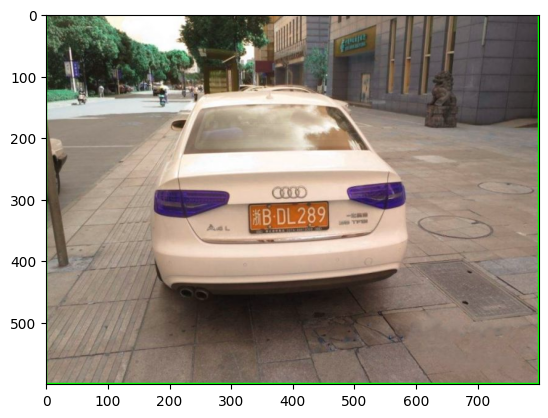

In [22]:
import cv2
import numpy as np

def order_points_new(pts):
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect.astype("int")

def process_image(image_path, ksize=4, thre=80, itera=1):
    ori_img = cv2.imread(image_path)
    img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)
    img = cv2.bilateralFilter(img, d=ksize, sigmaColor=75, sigmaSpace=75)
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    abs_sobelx = cv2.convertScaleAbs(sobelx)  # Convert back to CV_8U
    _, th1 = cv2.threshold(abs_sobelx, thre, 255, cv2.THRESH_BINARY)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    closed = cv2.morphologyEx(th1, cv2.MORPH_CLOSE, kernel)
    closed = cv2.dilate(closed, None, iterations=itera)
    closed = cv2.erode(closed, None, iterations=itera)
    cnts, _ = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:1]  # Keep only the largest contour, assumed to be the plate
    
    for c in cnts:
        rect = cv2.minAreaRect(c)
        Box = np.int0(cv2.boxPoints(rect))
        Box = order_points_new(Box)  # This should be done once per contour
        # Draw the contour on the original image
        ori_img = cv2.drawContours(ori_img, [Box], -1, (0, 255, 0), 2)

    return ori_img

# Example usage
processed_image = process_image(image_file[1])
# cv2.imshow('Processed Image', processed_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow( processed_image, cmap="gray")
plt.show()